In [1]:
from BaselineRemoval import BaselineRemoval
from scipy.signal import savgol_filter
from os import listdir,path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
path = r'C:\Users\ks\Desktop\Spectra Identification\Bio_4comp.csv'
df=pd.read_csv(path,header=0)
keys=df.keys()
wave=df['lambda'].to_numpy()


Index(['Unnamed: 0', 'lambda', 'PC1.csv', 'PC2.csv', 'PC3.csv', 'PC4.csv',
       'PC5.csv'],
      dtype='object')

Denoised : 0
1.0 0.0
Denoised : 1
1.0 0.0
Denoised : 2
1.0 0.0
Denoised : 3
1.0 0.0
Denoised : 4
1.0 0.0


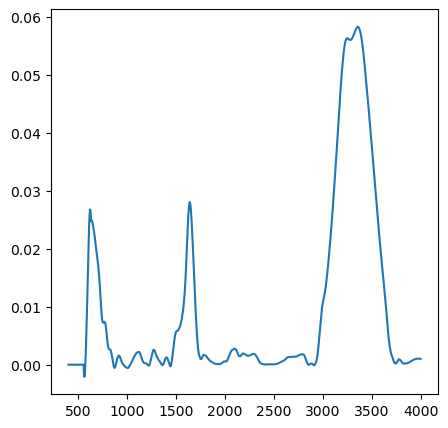

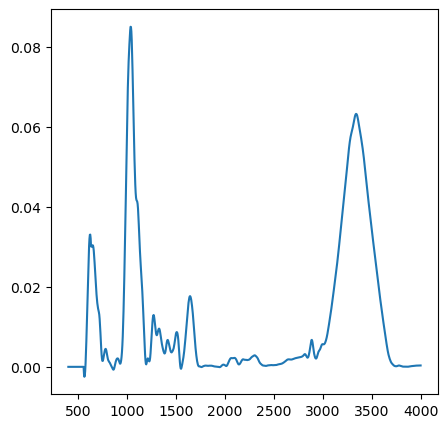

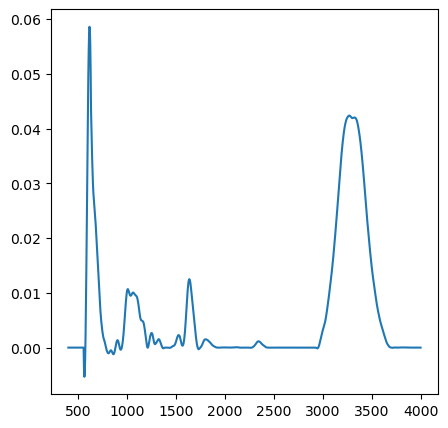

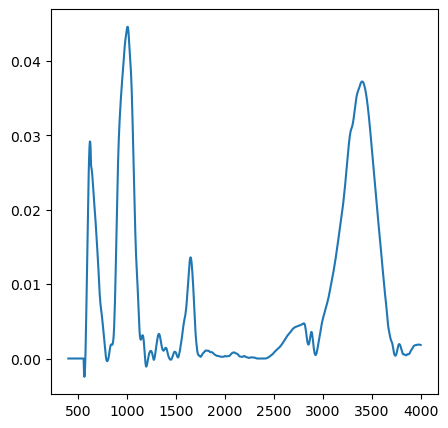

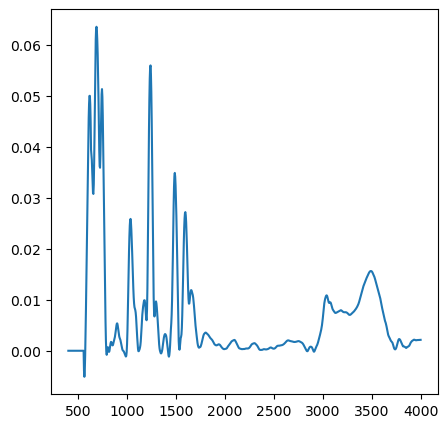

In [12]:
dict={}
dict['lambda']=wave
num=0
for key in keys[2:]:
    data=df[key].to_numpy()

    try:
        data=savgol_filter(data,19,2)
        print('Denoised :',num)
    except:
        pass
    maximum=max(data)
    minimum=min(data)
    data=(data-minimum)/(maximum-minimum)
    print(max(data),min(data))
    dict[key]=data
    num+=1

In [10]:
df=pd.DataFrame(dict)
df.to_csv(path.join(path,'Denoised_Scaled.csv'),index=None)